#***Personality Prediction***

## 🔍 **Problem Statement**

The goal of this project is to explore and understand the behavioral dataset collected from individuals to identify patterns and relationships between social behavior and personality types. The dataset includes various features such as time spent alone, social event attendance, stage fear, and post frequency, which may influence a person's personality.

* **The target variable is Personality, which is binary**:

   * 0 – Introvert

   * 1 – Extrovert

* **Through EDA, we aim to**:

   * Understand the distribution and variability of each feature.

   * Analyze the correlation between features and the target.

   * Identify trends or significant differences in behavior between introverts and extroverts.

   * Detect and handle any anomalies or missing values.

   * Prepare the data for model training by performing suitable transformations and encoding.

Ultimately, this analysis will guide the selection and training of machine learning models for accurate personality prediction.

##Libraries

In [1]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities

##Data

**Link Of Dataset:**

https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data

In [2]:
df=pd.read_csv("/content/personality_dataset.csv")
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [3]:
df.shape

(2900, 8)

In [4]:
df.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [5]:
df.tail(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2890,8.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2891,6.0,Yes,3.0,1.0,Yes,5.0,1.0,Introvert
2892,9.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2893,9.0,NaN,2.0,0.0,Yes,4.0,2.0,Introvert
2894,0.0,No,9.0,3.0,No,12.0,NaN,Extrovert
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


In [6]:
df.sample(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2109,0.0,No,4.0,6.0,No,13.0,7.0,Extrovert
10,3.0,No,9.0,6.0,No,15.0,5.0,Extrovert
2102,9.0,Yes,0.0,1.0,Yes,4.0,2.0,Introvert
370,2.0,No,3.0,4.0,No,8.0,7.0,Extrovert
1594,6.0,Yes,1.0,2.0,Yes,4.0,2.0,Introvert


In [7]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [9]:
print("The features of the Dataset are:")
features = len(df.columns)
features_list = [feature for feature in df.columns]
for feature in features_list:
  print(feature)

The features of the Dataset are:
Time_spent_Alone
Stage_fear
Social_event_attendance
Going_outside
Drained_after_socializing
Friends_circle_size
Post_frequency
Personality


**Description of Features:**

    - Time_spent_Alone: Hours spent alone daily (0–11).
    - Stage_fear: Presence of stage fright (Yes/No).
    - Social_event_attendance: Frequency of social events (0–10).
    - Going_outside: Frequency of going outside (0–7).
    - Drained_after_socializing: Feeling drained after socializing (Yes/No).
    - Friends_circle_size: Number of close friends (0–15).
    - Post_frequency: Social media post frequency (0–10).
    - Personality: Target variable (Extrovert/Introvert).*

In [10]:
df.describe(include=['O']).T

,count,unique,top,freq
Stage_fear,2827,2,No,1417
Drained_after_socializing,2848,2,No,1441
Personality,2900,2,Extrovert,1491


##Data Visualization

###Categorical Column

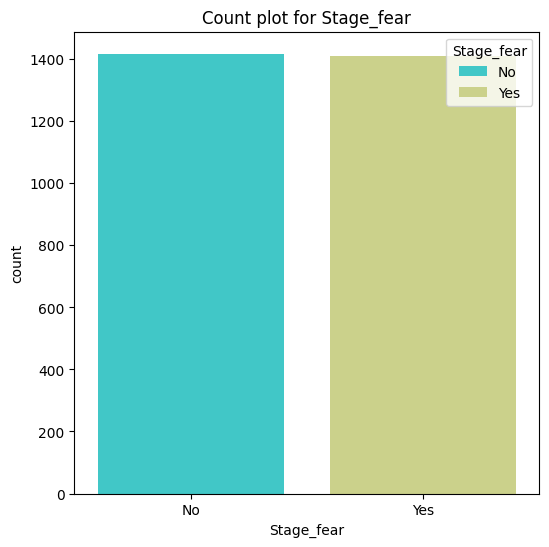

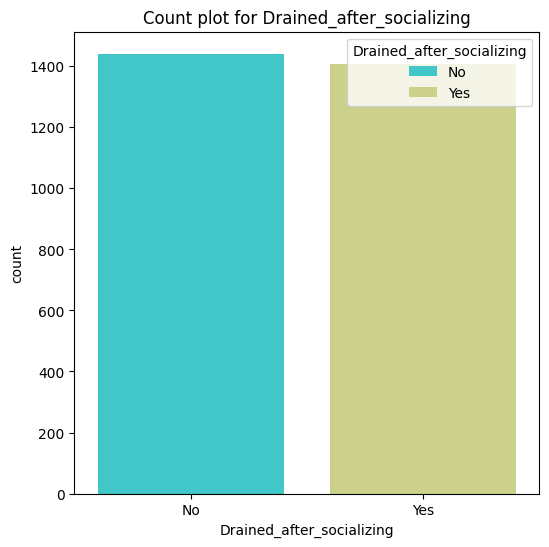

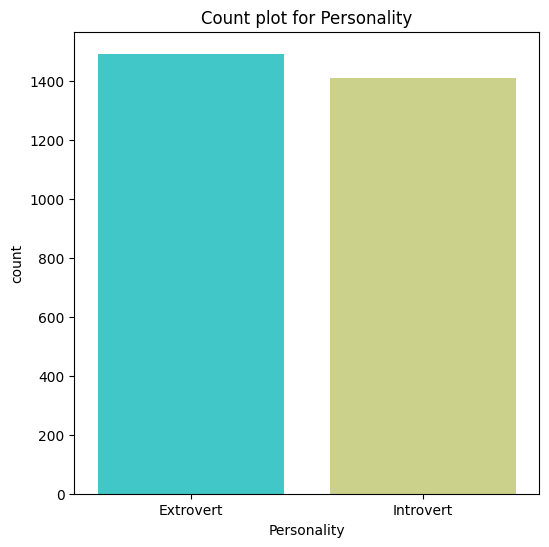

In [11]:
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns:
    plt.figure(figsize=(6,6))
    sns.countplot(data=df, x=col, hue=col, palette='rainbow')
    plt.title(f"Count plot for {col}")
    plt.show()

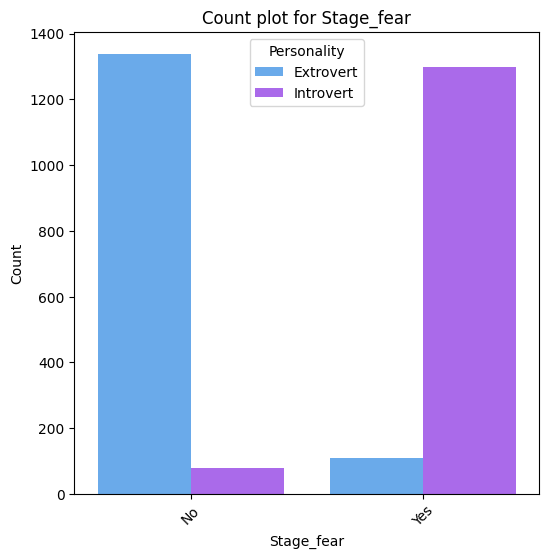

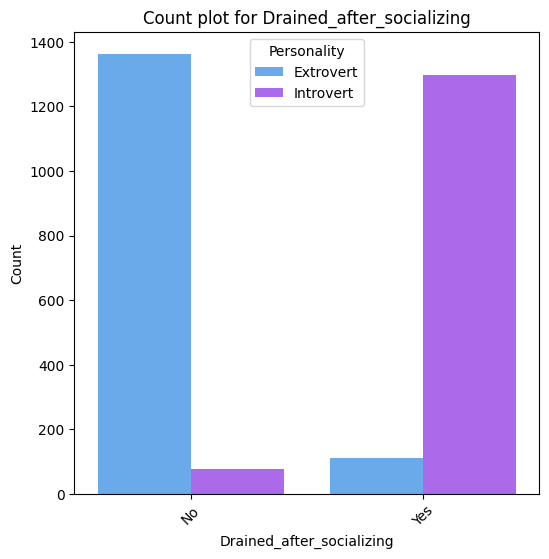

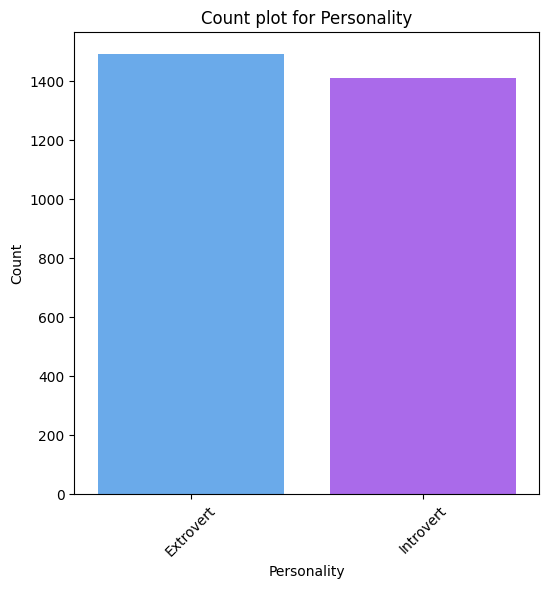

In [12]:
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns:
    plt.figure(figsize=(6,6))
    sns.countplot(data=df, x=col, hue='Personality', palette='cool')
    plt.title(f"Count plot for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

**Inferences:**

- Introverts often feel mentally exhausted after social interactions.

- Extroverts are more likely to feel energized or unaffected after socializing.

- Introverts are more likely to have stage fear.

- Extroverts are less likely to have stage fear, likely due to their comfort in social or public settings.

In [13]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

###Numerical Column

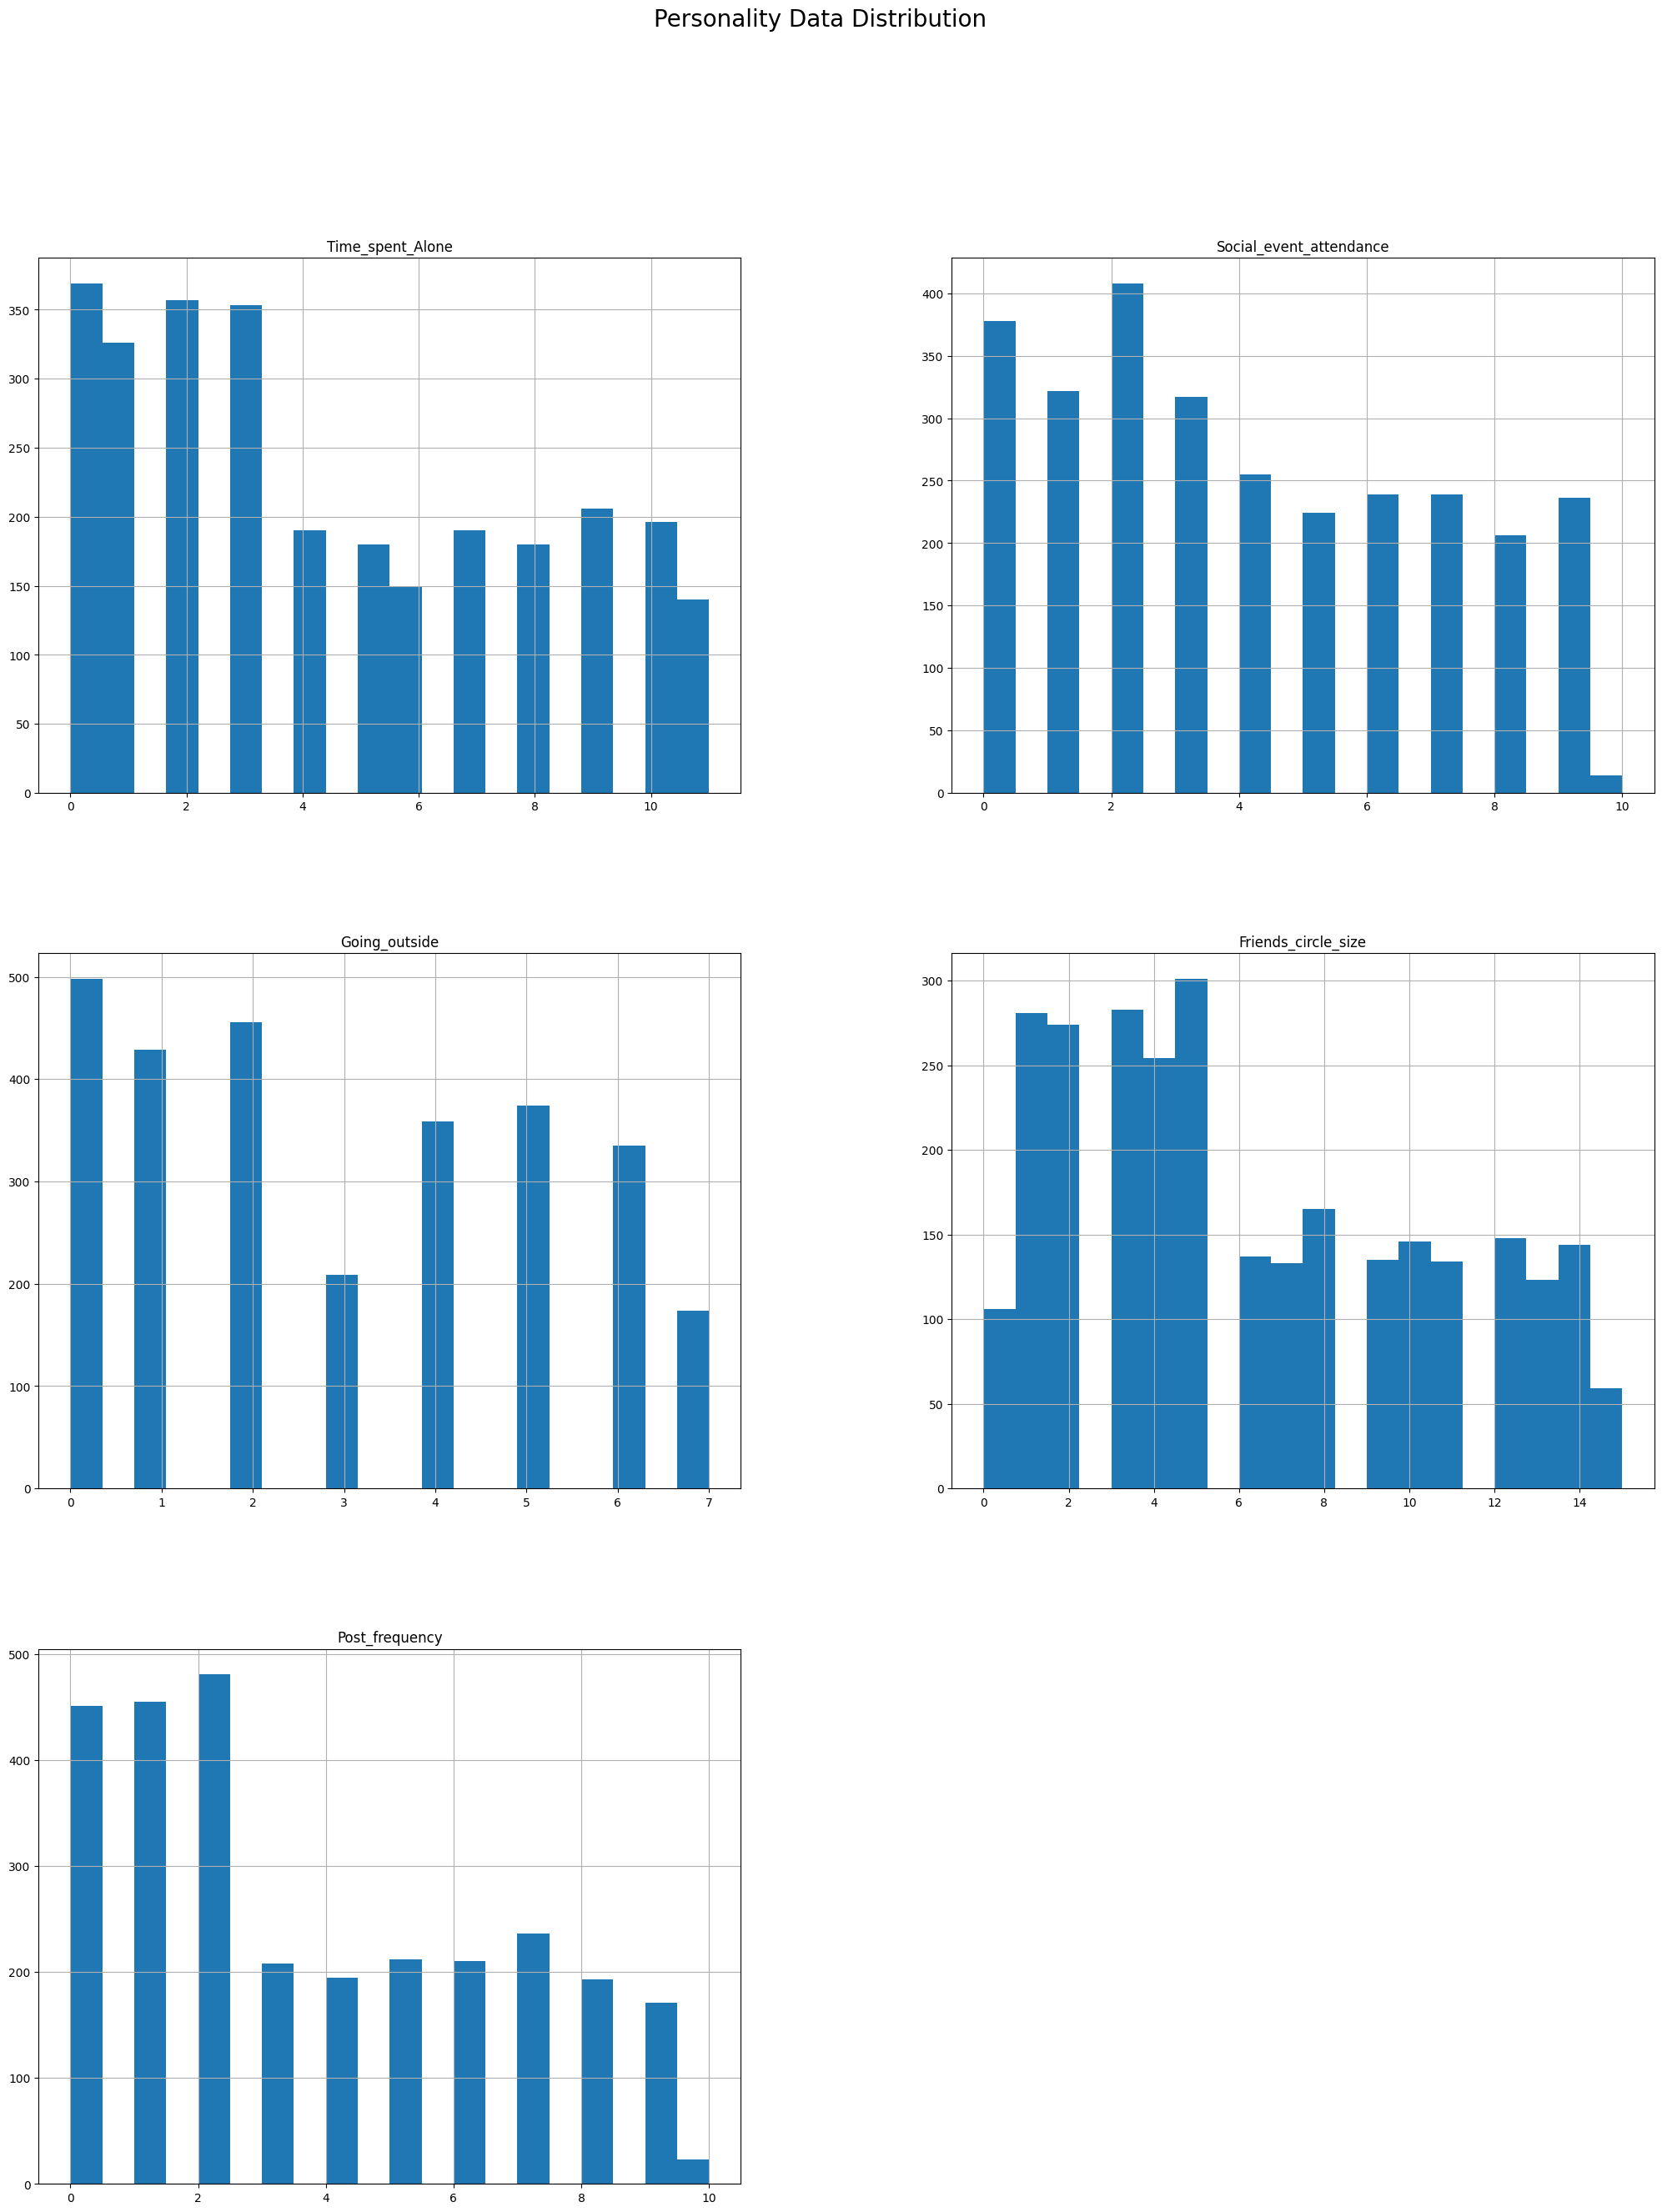

In [14]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle('Personality Data Distribution', fontsize=20)
plt.show()

###Target Variable

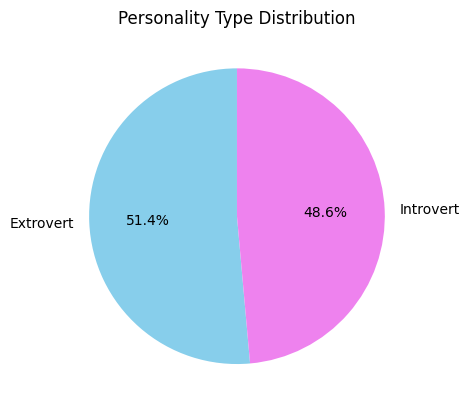

In [15]:
df['Personality'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'violet'], startangle=90)
plt.title('Personality Type Distribution')
plt.ylabel('')
plt.show()


**Inference:**

- The dataset is fairly balanced between extroverts and introverts.

- There is a slightly higher number of extroverts compared to introverts.

- This balance is useful for training machine learning models, especially classification algorithms, since it avoids severe class imbalance.

##Cleaning

###Handling duplicate/Null values

In [16]:
df.duplicated().sum()

np.int64(388)

In [17]:
df = df.drop_duplicates()

* 388 duplicates are there. So drop it.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2451 non-null   float64
 1   Stage_fear                 2439 non-null   object 
 2   Social_event_attendance    2451 non-null   float64
 3   Going_outside              2447 non-null   float64
 4   Drained_after_socializing  2461 non-null   object 
 5   Friends_circle_size        2437 non-null   float64
 6   Post_frequency             2449 non-null   float64
 7   Personality                2512 non-null   object 
dtypes: float64(5), object(3)
memory usage: 176.6+ KB


In [19]:
df.isnull().sum()

,0
Time_spent_Alone,61
Stage_fear,73
Social_event_attendance,61
Going_outside,65
Drained_after_socializing,51
Friends_circle_size,75
Post_frequency,63
Personality,0


In [20]:
#Columns with missing values
df.isna().sum()[df.isna().sum() != 0]

,0
Time_spent_Alone,61
Stage_fear,73
Social_event_attendance,61
Going_outside,65
Drained_after_socializing,51
Friends_circle_size,75
Post_frequency,63


In [21]:
# Calculate  the percentage of missing values and round to 2
(df.isna().sum()/df.shape[0]*100).round(2)

,0
Time_spent_Alone,2.43
Stage_fear,2.91
Social_event_attendance,2.43
Going_outside,2.59
Drained_after_socializing,2.03
Friends_circle_size,2.99
Post_frequency,2.51
Personality,0.00


In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
# Fill Stage_fear with its mode
df['Stage_fear'] = df['Stage_fear'].fillna(df['Stage_fear'].mode()[0])

# Fill Drained_after_socializing with its mode
df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0])

<ipython-input-23-761565286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stage_fear'] = df['Stage_fear'].fillna(df['Stage_fear'].mode()[0])
<ipython-input-23-761565286>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0])


In [24]:
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency']

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

<ipython-input-24-278378455>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2512 non-null   float64
 1   Stage_fear                 2512 non-null   object 
 2   Social_event_attendance    2512 non-null   float64
 3   Going_outside              2512 non-null   float64
 4   Drained_after_socializing  2512 non-null   object 
 5   Friends_circle_size        2512 non-null   float64
 6   Post_frequency             2512 non-null   float64
 7   Personality                2512 non-null   object 
dtypes: float64(5), object(3)
memory usage: 176.6+ KB


In [26]:
df.duplicated().sum()

np.int64(9)

In [27]:
df = df.drop_duplicates()

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2503 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2503 non-null   float64
 1   Stage_fear                 2503 non-null   object 
 2   Social_event_attendance    2503 non-null   float64
 3   Going_outside              2503 non-null   float64
 4   Drained_after_socializing  2503 non-null   object 
 5   Friends_circle_size        2503 non-null   float64
 6   Post_frequency             2503 non-null   float64
 7   Personality                2503 non-null   object 
dtypes: float64(5), object(3)
memory usage: 176.0+ KB


##Encoding

In [30]:
# Make a copy to avoid changing original
data = df.copy()

# Encode binary Yes/No features
data['Stage_fear'] = data['Stage_fear'].map({'No': 0, 'Yes': 1})
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({'No': 0, 'Yes': 1})

# Encode target label: Introvert = 0, Extrovert = 1
data['Personality'] = data['Personality'].map({'Introvert': 0, 'Extrovert': 1})

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2503 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2503 non-null   float64
 1   Stage_fear                 2503 non-null   int64  
 2   Social_event_attendance    2503 non-null   float64
 3   Going_outside              2503 non-null   float64
 4   Drained_after_socializing  2503 non-null   int64  
 5   Friends_circle_size        2503 non-null   float64
 6   Post_frequency             2503 non-null   float64
 7   Personality                2503 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 176.0 KB


##Data Transformation

###Skewed Data

####Histograms

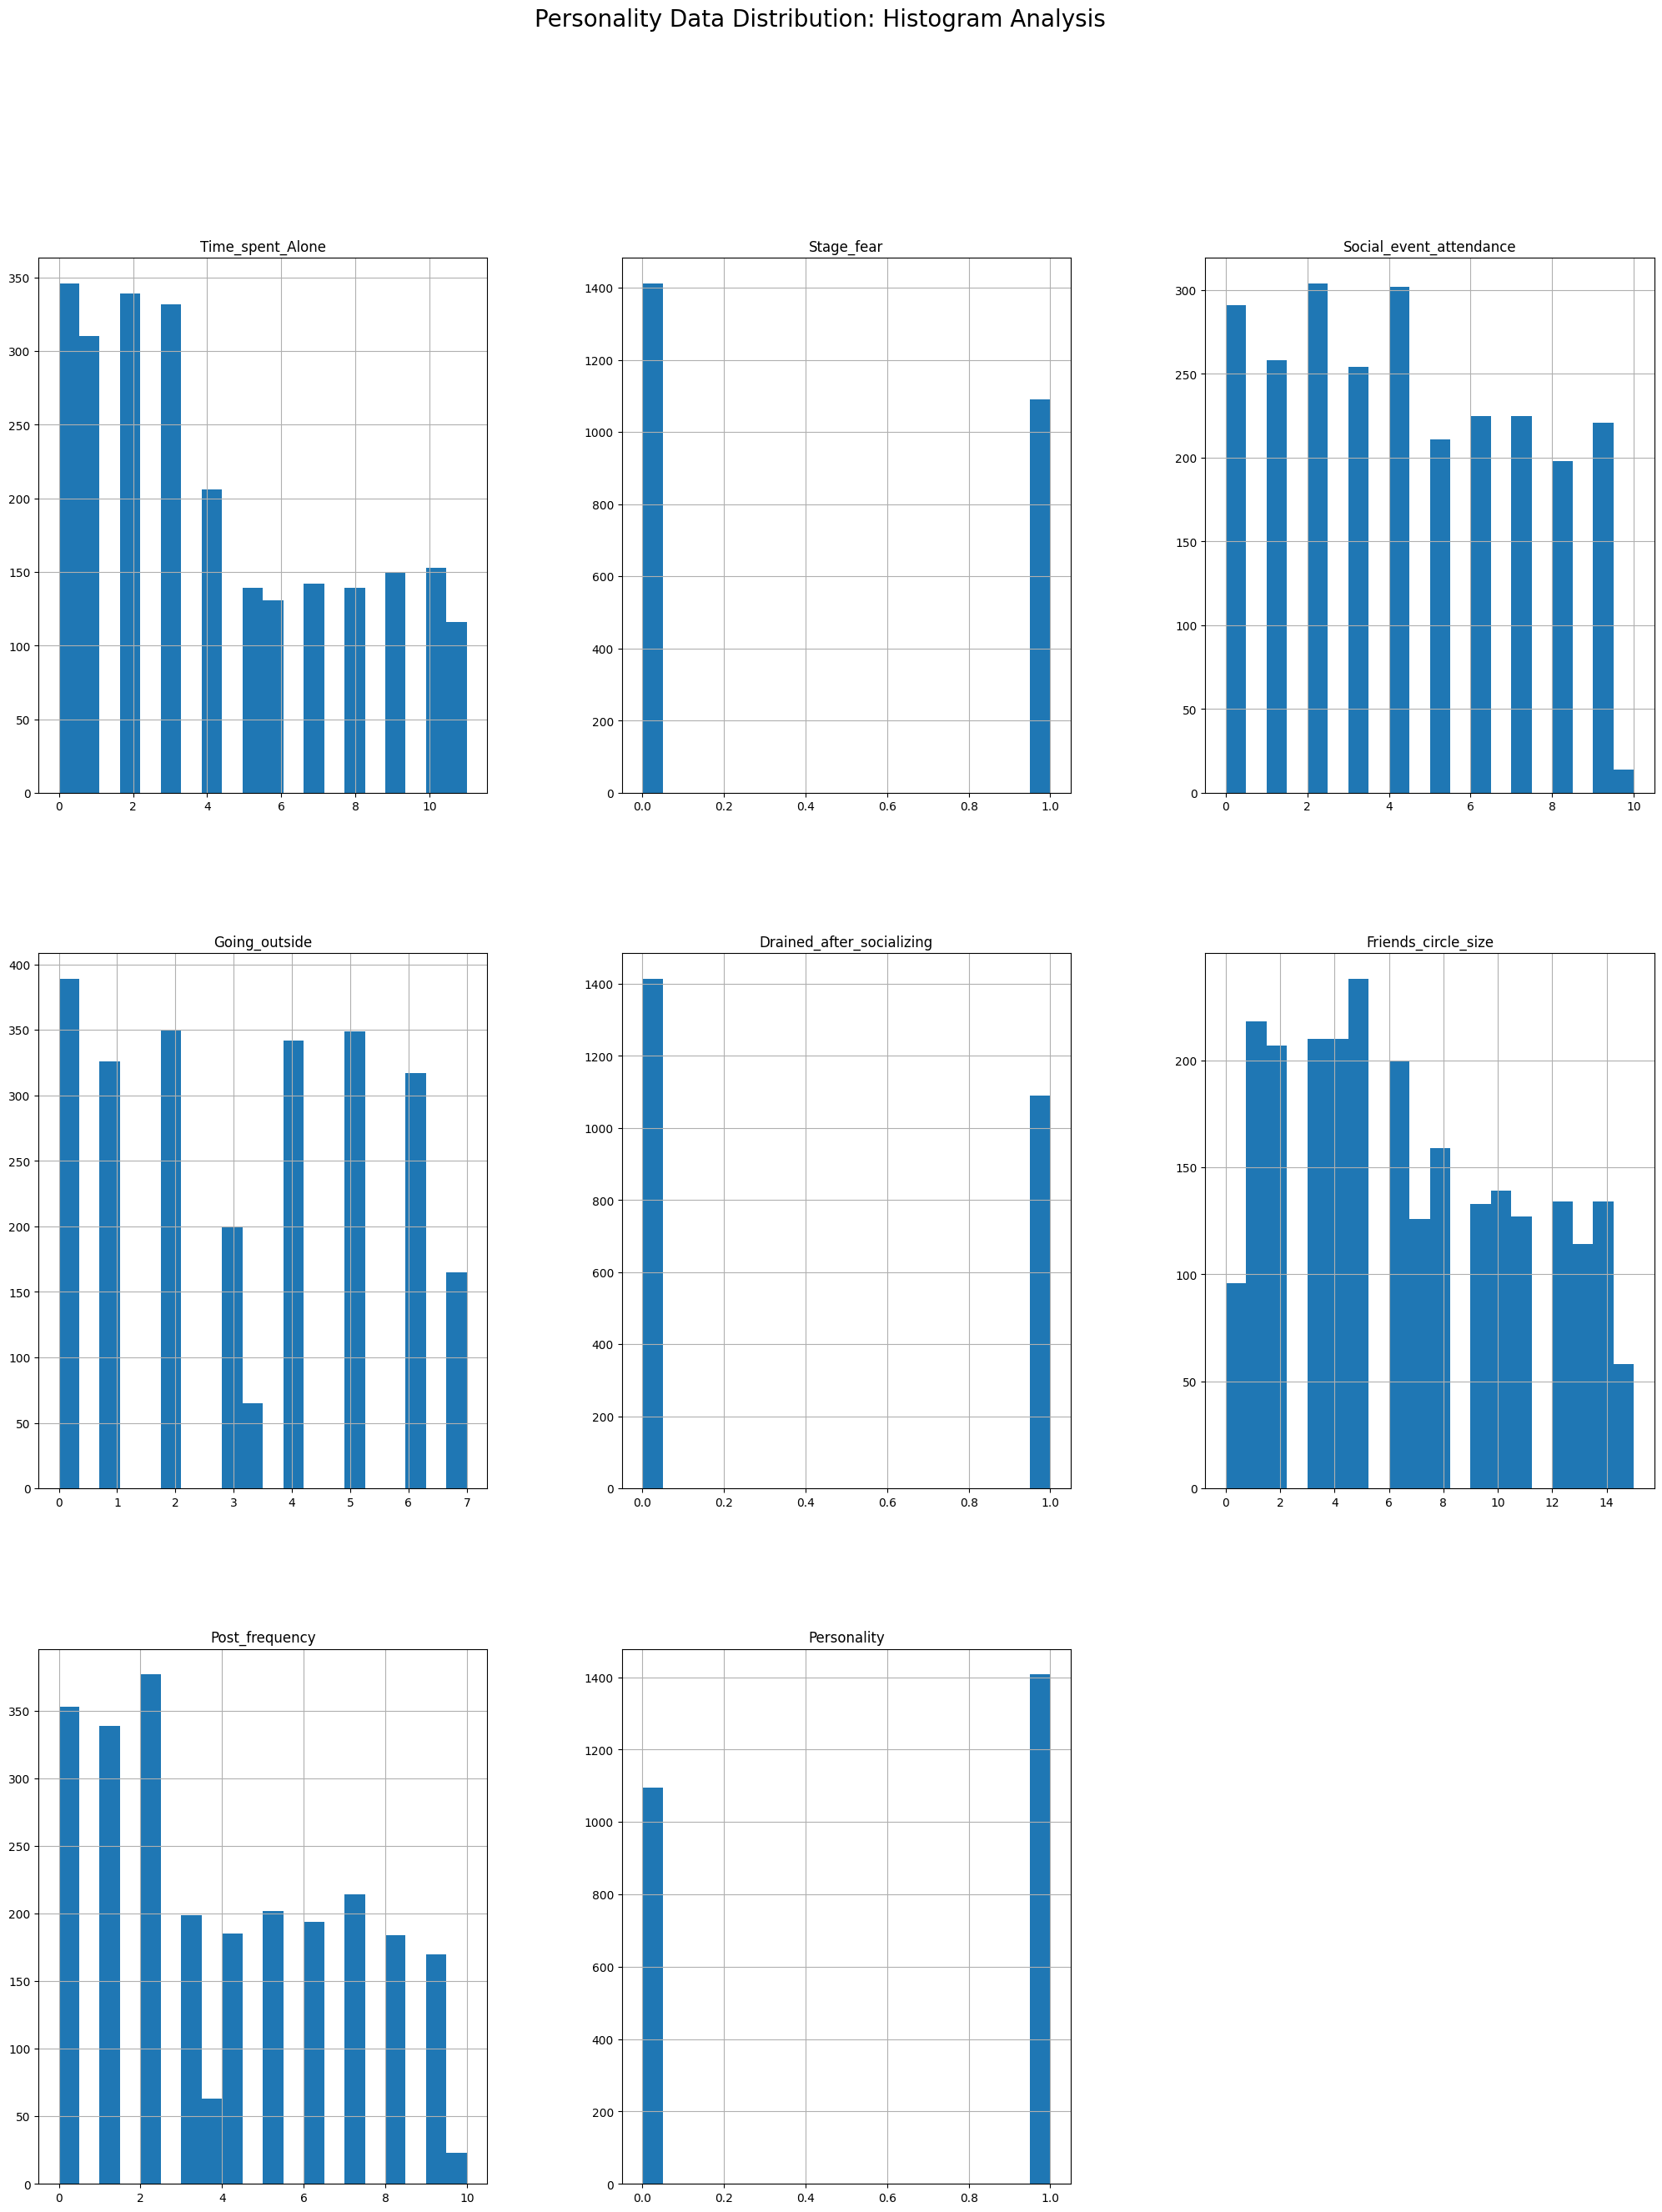

In [32]:
data.hist(bins=20,figsize=(25,30))
plt.suptitle('Personality Data Distribution: Histogram Analysis', fontsize=20)
plt.show()

In [33]:
# Calculate skewness for each column
skewness = data.skew()

# Sort the skewness values in ascending order
sorted_skewness = skewness.sort_values(ascending=True)

# Displays the sorted skewness values
print(sorted_skewness)

Personality                 -0.252230
Going_outside                0.054281
Social_event_attendance      0.167886
Stage_fear                   0.258783
Drained_after_socializing    0.262063
Friends_circle_size          0.301286
Post_frequency               0.350550
Time_spent_Alone             0.534539
dtype: float64


* No skewness here

###Removing unwanted features

####Base on correlation

<Axes: >

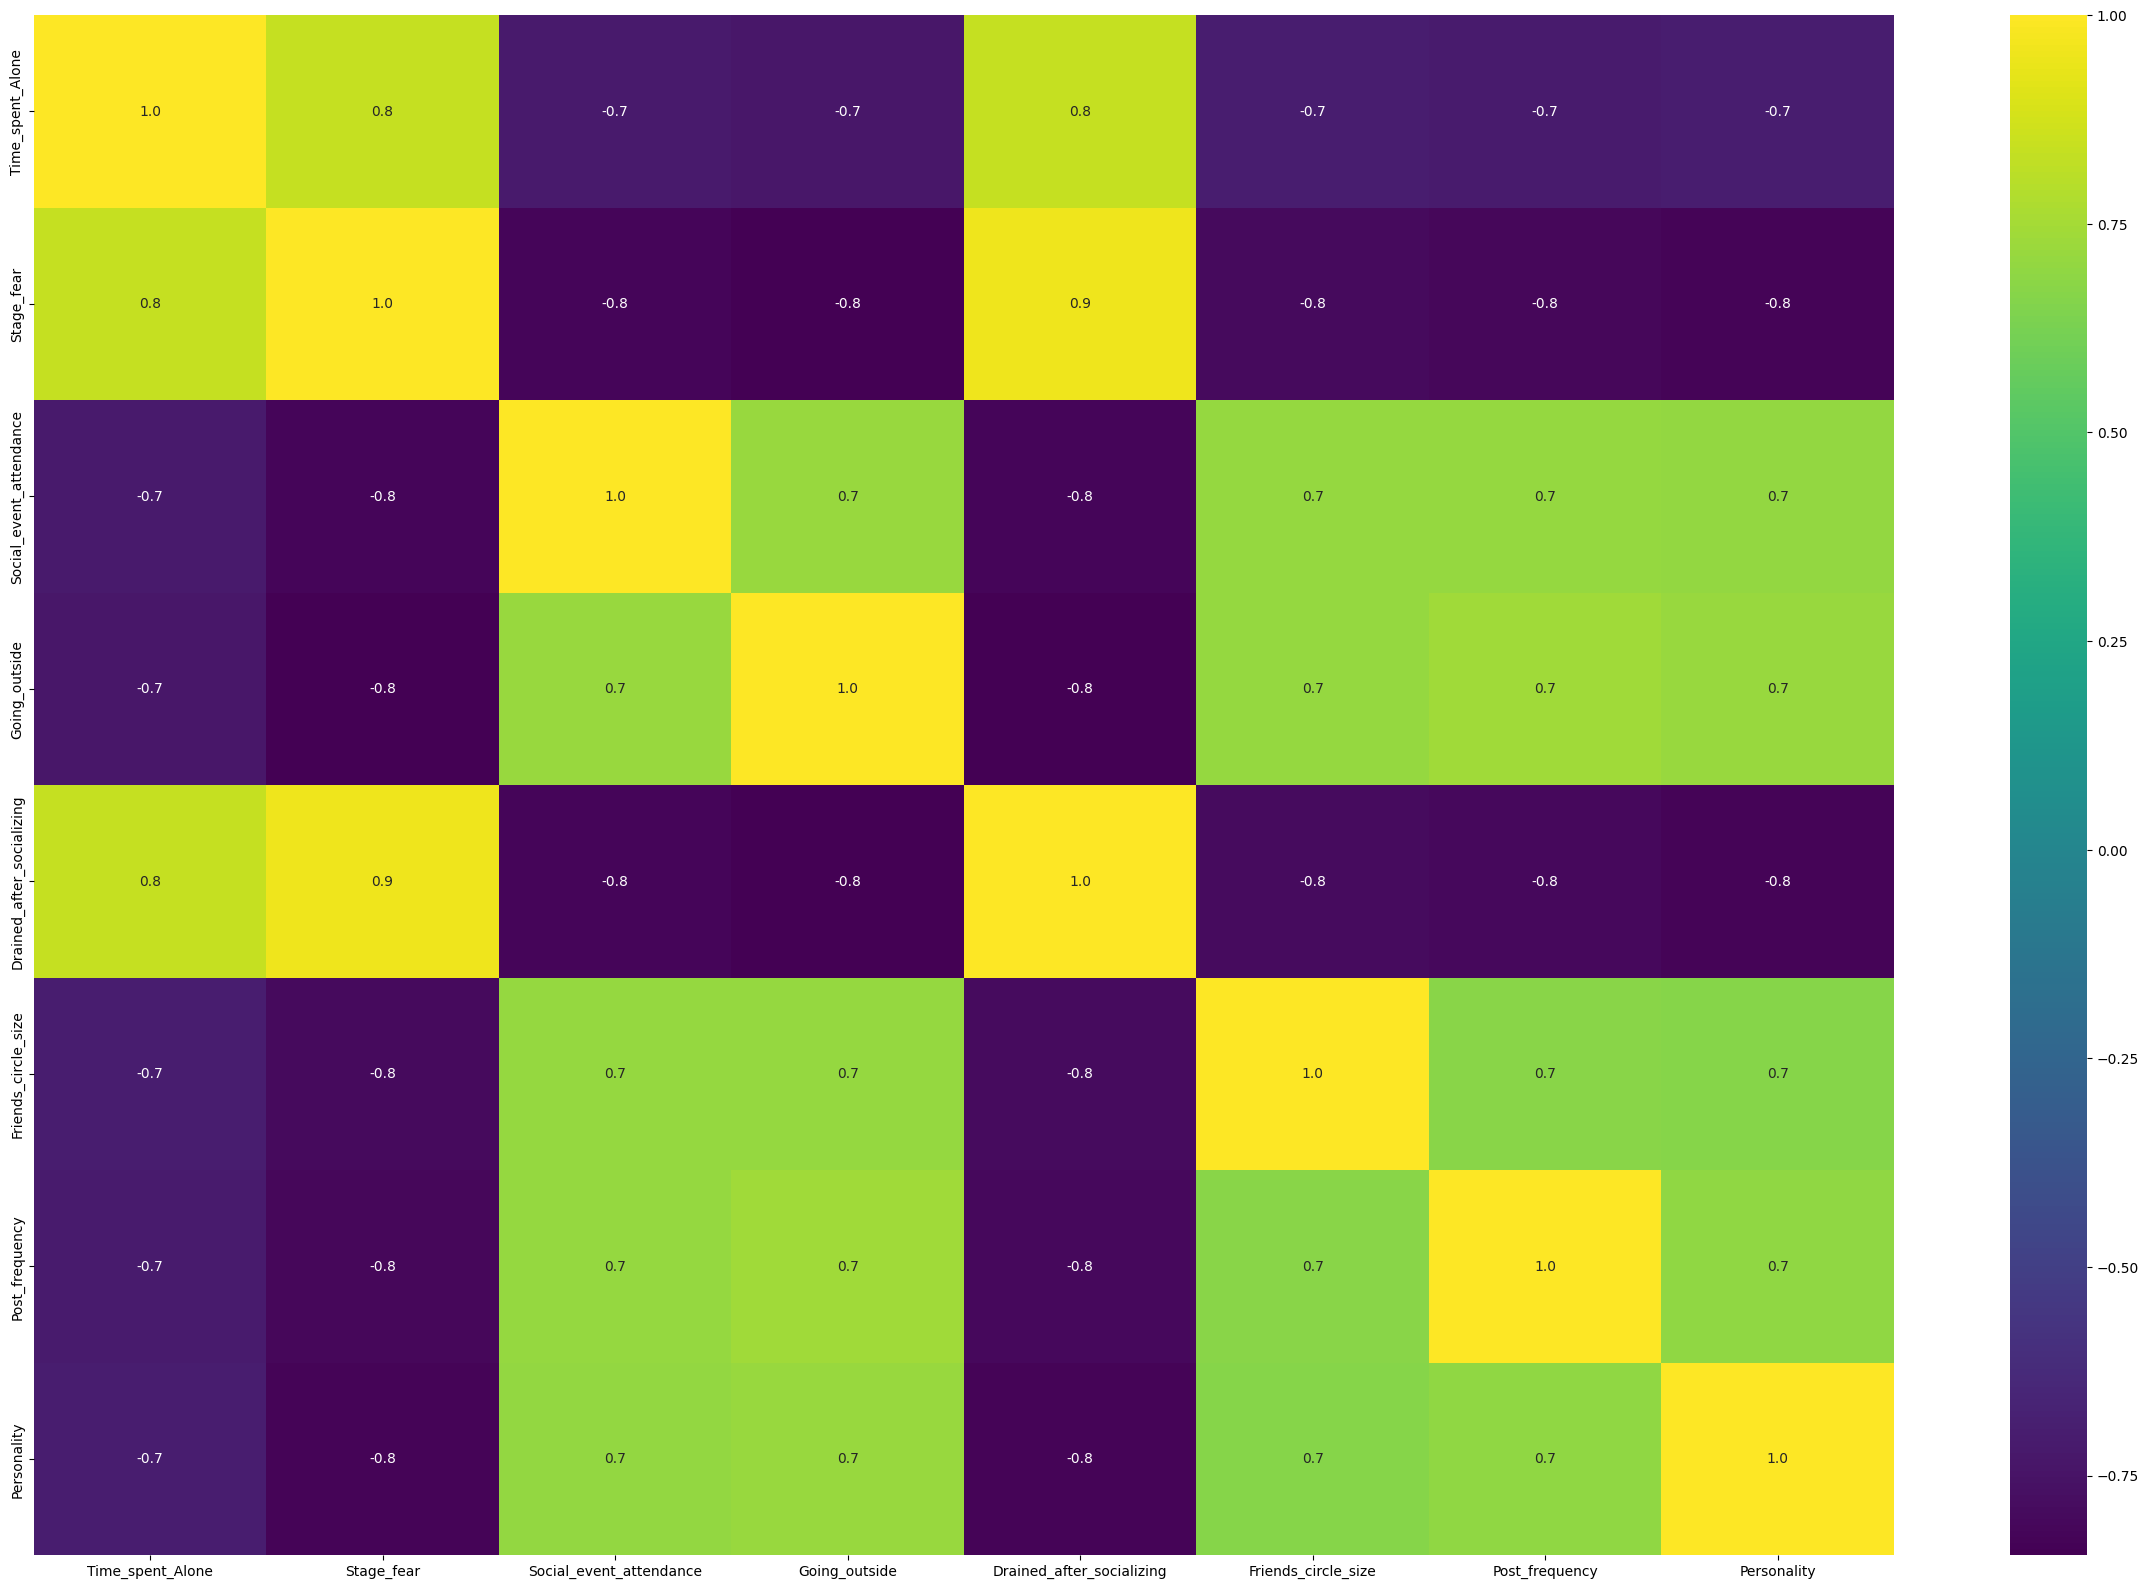

In [34]:
plt.figure(figsize=(30,20))
data.corr(numeric_only=True)
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='viridis',fmt='0.01f',annot_kws=None)

In [35]:
correlation_matrix=data.corr()
# Set the correlation threshold
threshold=0.5
# Find pairs of features with high correlation
highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    # Check if the absolute correlation exceeds the threshold
    if abs(correlation_matrix.iloc[i,j])>threshold:
      highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
# Print all pairs of highly correlated features
print(highly_correlated_pairs)

[('Stage_fear', 'Time_spent_Alone'), ('Social_event_attendance', 'Time_spent_Alone'), ('Social_event_attendance', 'Stage_fear'), ('Going_outside', 'Time_spent_Alone'), ('Going_outside', 'Stage_fear'), ('Going_outside', 'Social_event_attendance'), ('Drained_after_socializing', 'Time_spent_Alone'), ('Drained_after_socializing', 'Stage_fear'), ('Drained_after_socializing', 'Social_event_attendance'), ('Drained_after_socializing', 'Going_outside'), ('Friends_circle_size', 'Time_spent_Alone'), ('Friends_circle_size', 'Stage_fear'), ('Friends_circle_size', 'Social_event_attendance'), ('Friends_circle_size', 'Going_outside'), ('Friends_circle_size', 'Drained_after_socializing'), ('Post_frequency', 'Time_spent_Alone'), ('Post_frequency', 'Stage_fear'), ('Post_frequency', 'Social_event_attendance'), ('Post_frequency', 'Going_outside'), ('Post_frequency', 'Drained_after_socializing'), ('Post_frequency', 'Friends_circle_size'), ('Personality', 'Time_spent_Alone'), ('Personality', 'Stage_fear'), (

In [36]:
# Step 1: Calculate the correlation of each feature with the target
corr_with_taarget=data.corr()['Personality'].sort_values(ascending=False)

# Step 2: Set the threshold for low correlation (-0.1 to 0.1)
low_corr_features=corr_with_taarget[(corr_with_taarget>-0.05) & (corr_with_taarget<0.05)]

# Step 3: Print the list of features with low correlation
print("Features with correlation between -0.05 and 0.05:")
low_corr_features

Features with correlation between -0.05 and 0.05:


,Personality


* Removing unwanted features not needed

###Scaling

In [37]:
# Create a copy of the original data for comparison
scaled_data = data.copy()
# Select numeric columns, excluding 'LoanApproved'
numeric_columns = data.drop(columns=['Personality']).select_dtypes(include=['number']).columns
# Initialize the StandardScaler
scaler = StandardScaler()
# Apply the scaler only to the numeric columns
scaled_data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
scaled_data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.064761,-0.879012,-0.073732,1.264536,-0.877585,1.504098,0.402999,1
1,1.404119,1.137640,-1.465619,-1.443119,1.139491,-1.549528,-0.283284,0
2,1.404119,1.137640,-1.117647,-0.540567,1.139491,-0.375057,-0.626425,0
3,-1.239864,-0.879012,0.622211,1.715811,-0.877585,1.738993,1.432423,1
4,-0.358537,-0.879012,1.666126,0.361984,-0.877585,0.329627,0.402999,1


* Scaling is not needed in this EDA . So I cannot use it.

###Handling Outliers

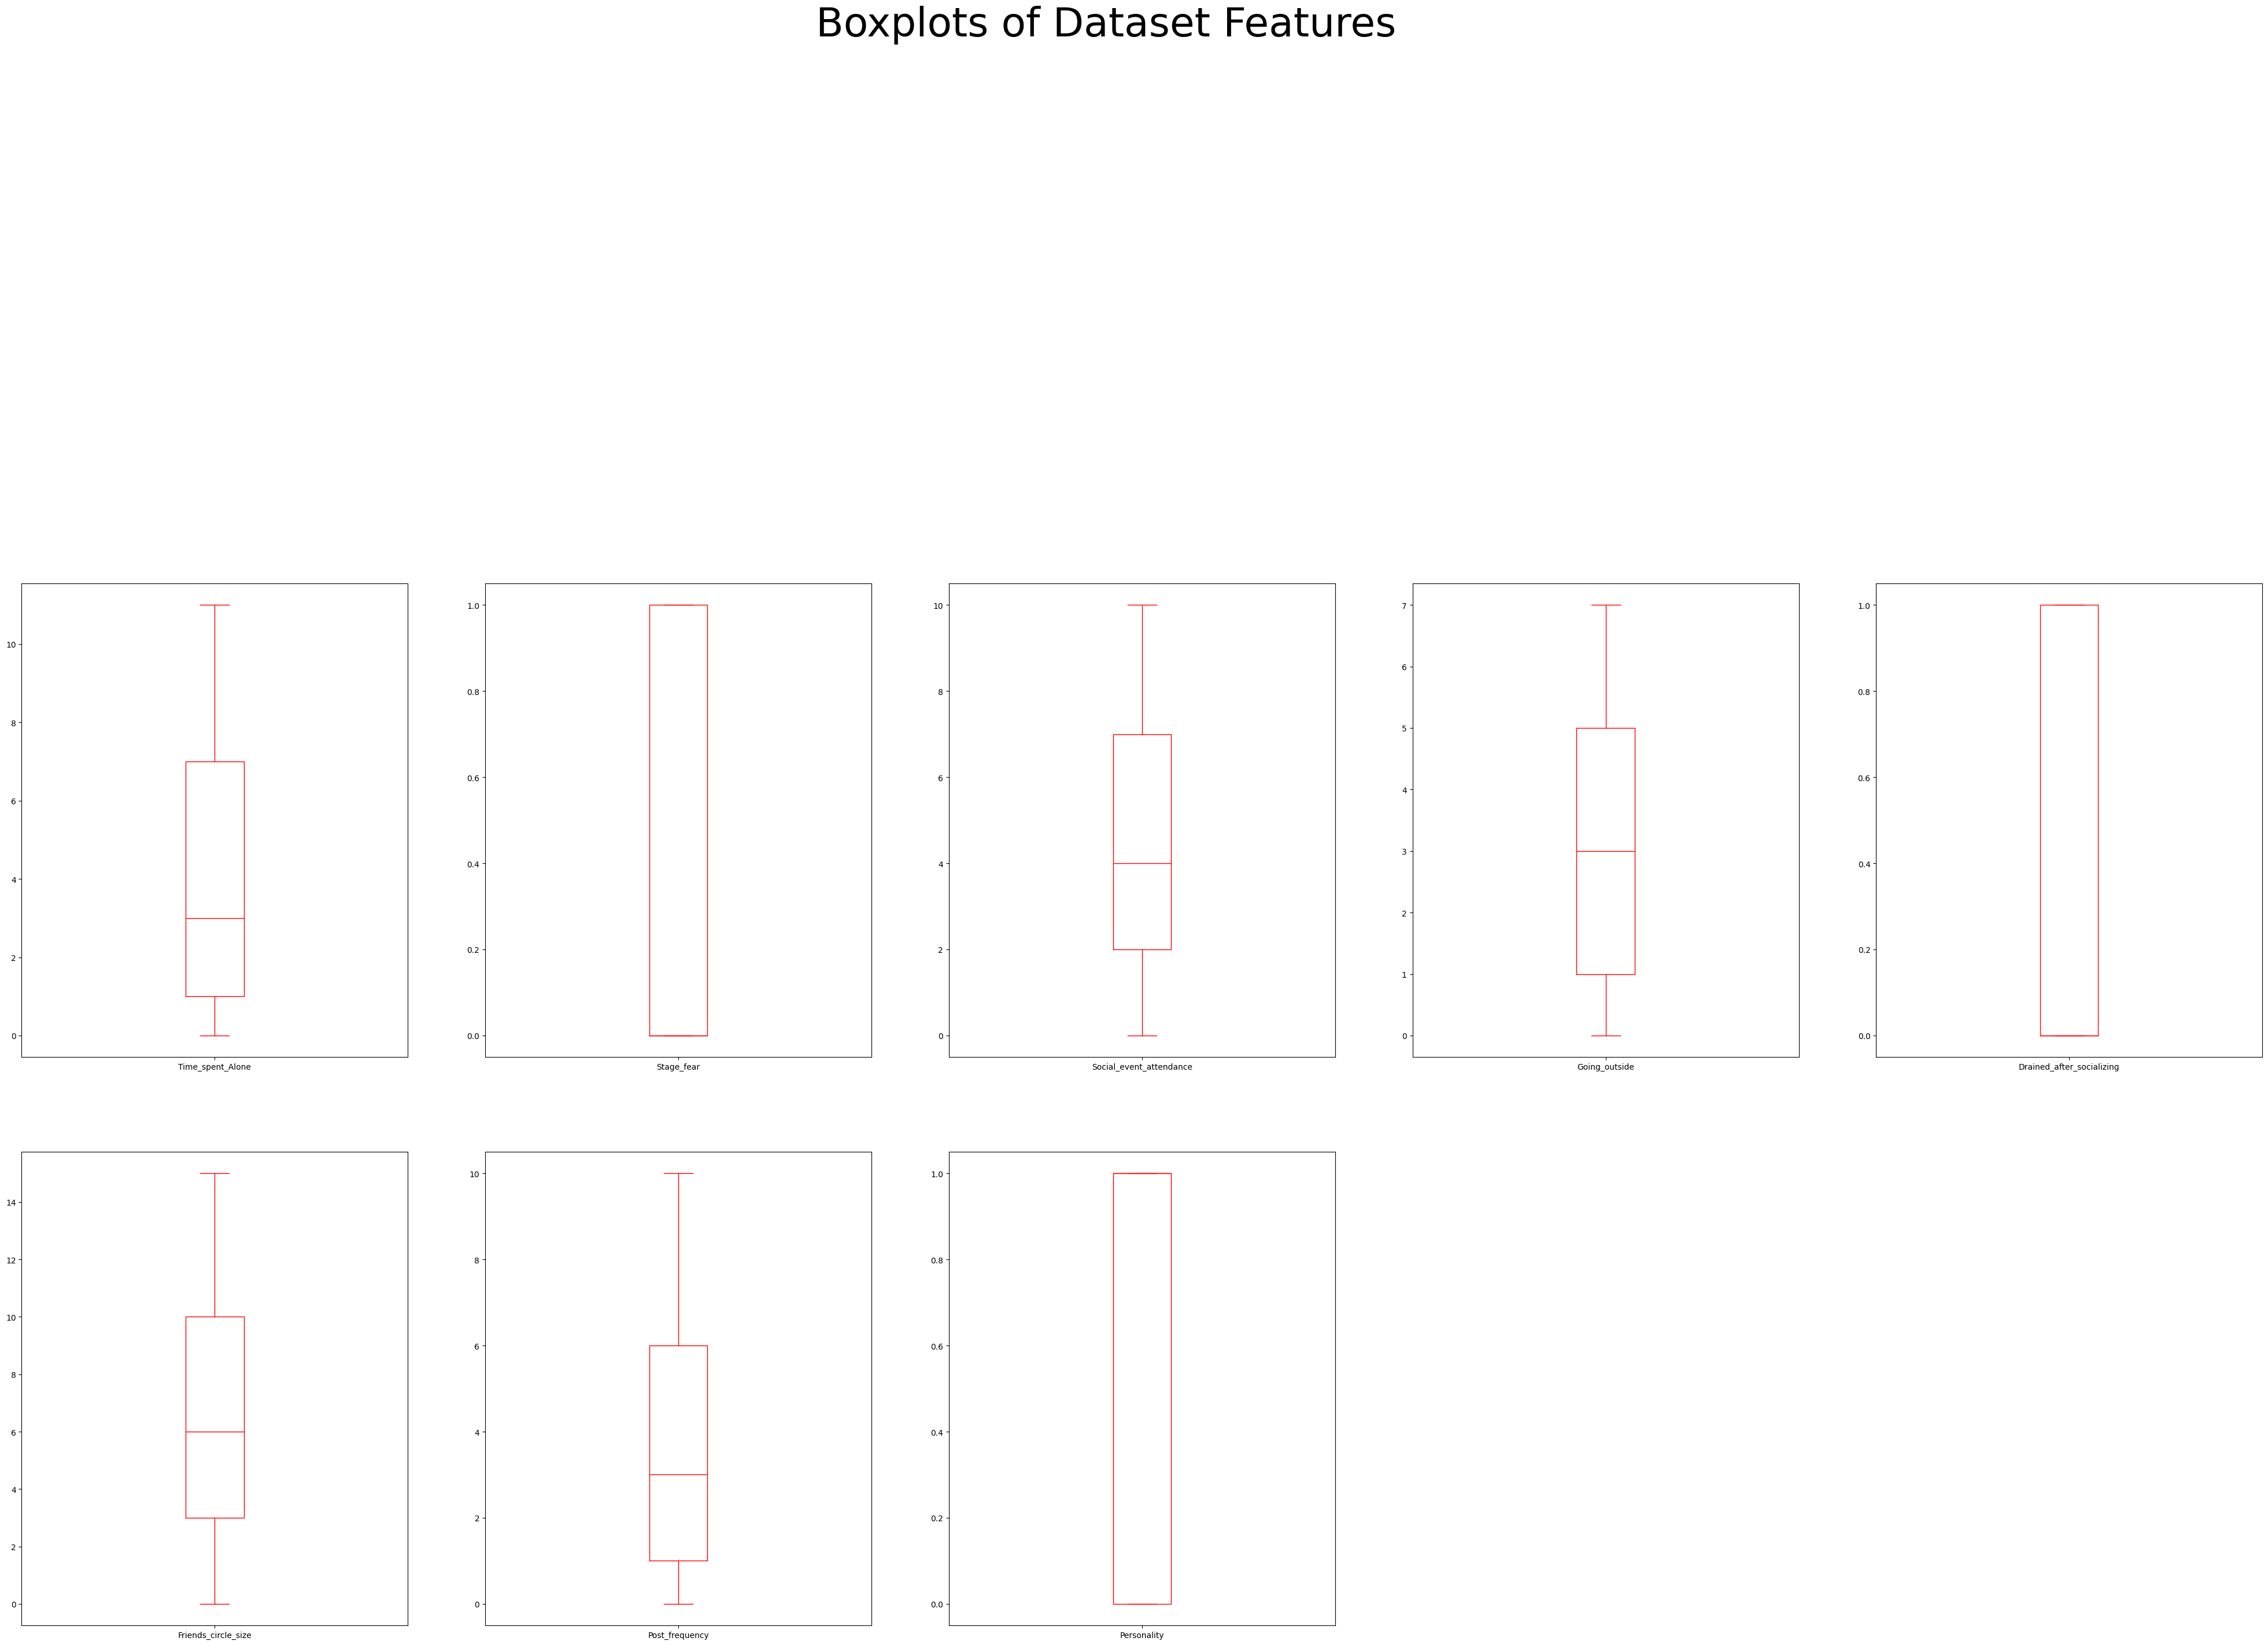

In [38]:
data.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='red')
plt.suptitle('Boxplots of Dataset Features',fontsize=50)
plt.show()

* No outliers here

##Model Training and Evaluation

In [39]:
x = data.drop(['Personality'],axis=1)
y = data['Personality']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
print('Shape of Training Features: ',x_train.shape)
print('Shape of Testing Features: ',x_test.shape)
print('Shape of Training Target: ',y_train.shape)
print('Shape of Testing Target: ',x_test.shape)

Shape of Training Features:  (2002, 7)
Shape of Testing Features:  (501, 7)
Shape of Training Target:  (2002,)
Shape of Testing Target:  (501, 7)


In [41]:
# Initializing Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(x_train, y_train)

# Predictions
y_pred=logreg.predict(x_test)

In [42]:
# Accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9261


In [43]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test,y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       229
           1       0.95      0.92      0.93       272

    accuracy                           0.93       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.93      0.93      0.93       501



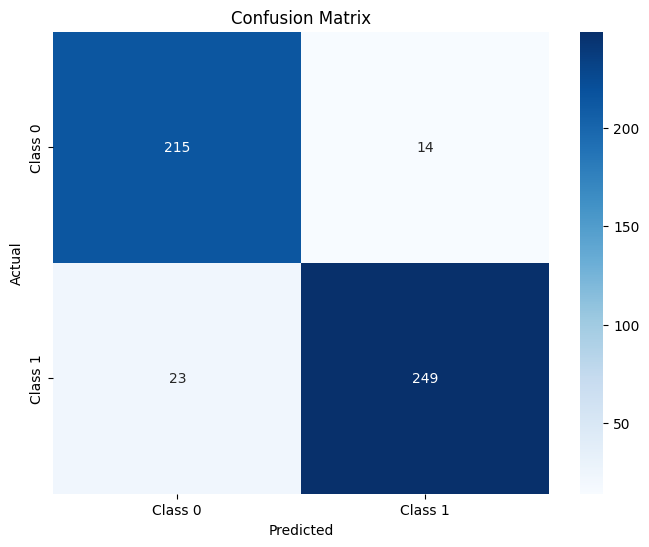

In [44]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=["Class 0","Class 1"],yticklabels=["Class 0","Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Training and Evaluating Logistic Regression...
Accuracy: 0.9261

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       229
           1       0.95      0.92      0.93       272

    accuracy                           0.93       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.93      0.93      0.93       501



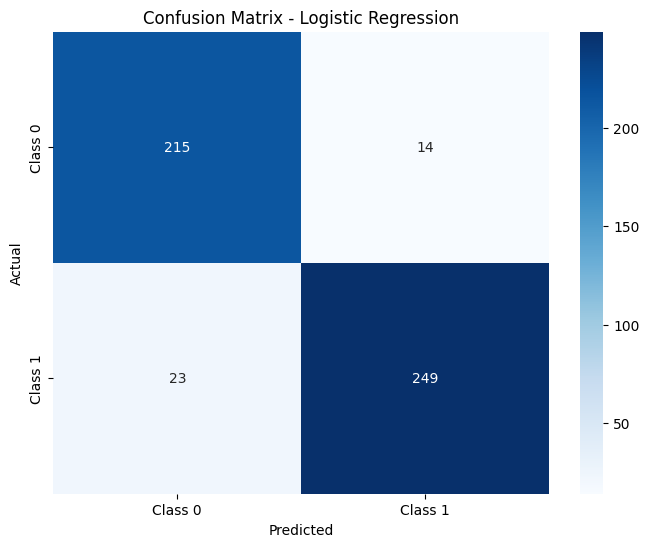

--------------------------------------------------------------------------------
Training and Evaluating Random Forest...
Accuracy: 0.8982

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       229
           1       0.91      0.90      0.91       272

    accuracy                           0.90       501
   macro avg       0.90      0.90      0.90       501
weighted avg       0.90      0.90      0.90       501



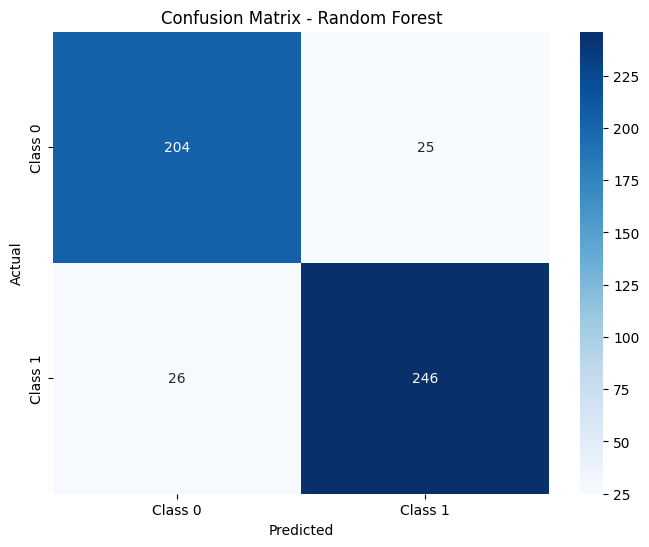

--------------------------------------------------------------------------------
Training and Evaluating Decision Tree...
Accuracy: 0.8703

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       229
           1       0.90      0.85      0.88       272

    accuracy                           0.87       501
   macro avg       0.87      0.87      0.87       501
weighted avg       0.87      0.87      0.87       501



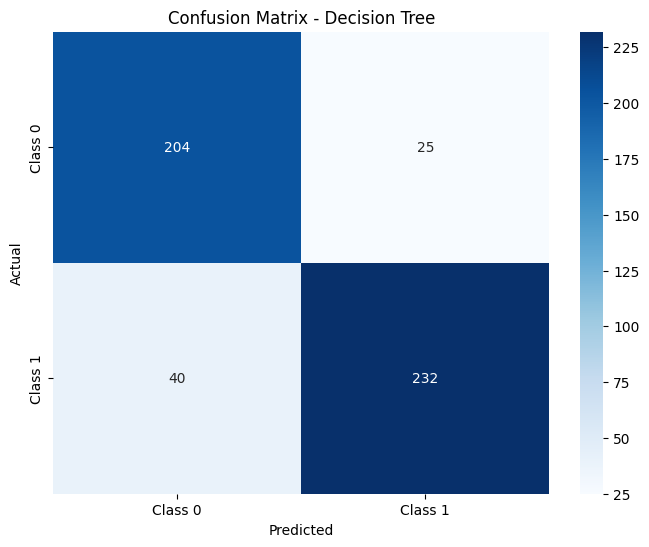

--------------------------------------------------------------------------------
Training and Evaluating K-Nearest Neighbors...
Accuracy: 0.9321

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       229
           1       0.96      0.91      0.94       272

    accuracy                           0.93       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.93      0.93      0.93       501



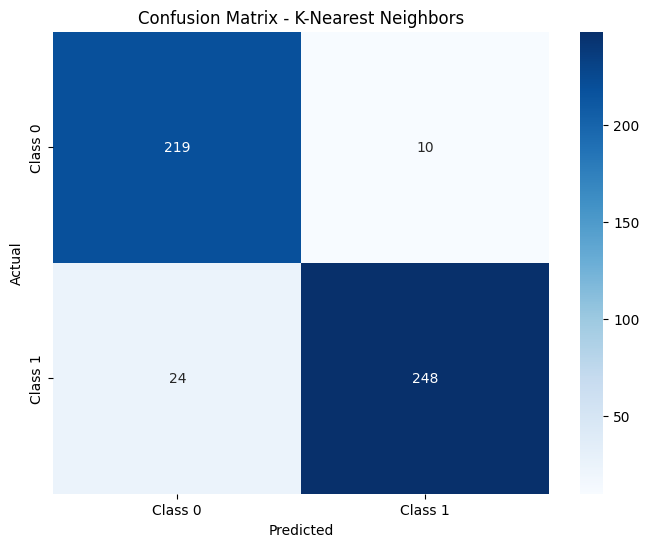

--------------------------------------------------------------------------------
Training and Evaluating Support Vector Machine...
Accuracy: 0.9261

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       229
           1       0.95      0.92      0.93       272

    accuracy                           0.93       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.93      0.93      0.93       501



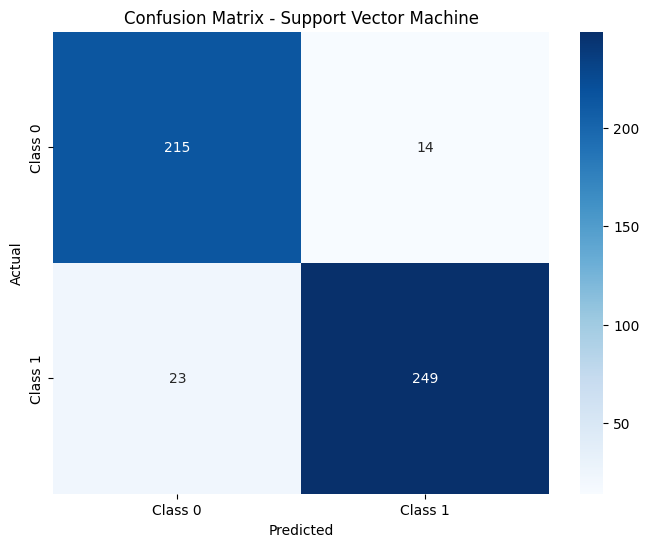

--------------------------------------------------------------------------------
Training and Evaluating Extra Trees...
Accuracy: 0.9002

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       229
           1       0.91      0.90      0.91       272

    accuracy                           0.90       501
   macro avg       0.90      0.90      0.90       501
weighted avg       0.90      0.90      0.90       501



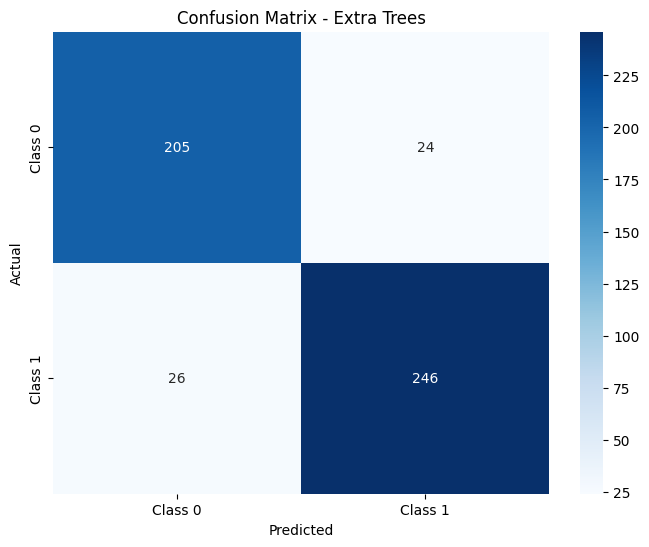

--------------------------------------------------------------------------------


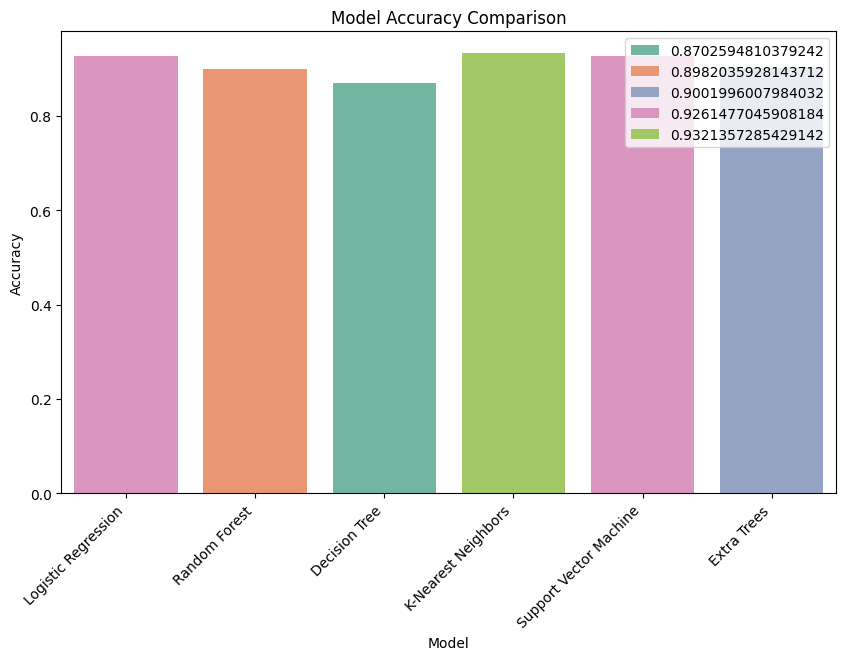

In [45]:
# Define models to evaluate
models={
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'K-Nearest Neighbors':KNeighborsClassifier(n_neighbors=11),
    'Support Vector Machine':SVC(kernel='linear',probability=True),
    'Extra Trees':ExtraTreesClassifier()
}
# Initialize a list to store model names and accuracies
model_accuracies = []

# Loop through models, train, and evaluate
for model_name,model in models.items():
  print(f'Training and Evaluating {model_name}...')

  # Train the model
  model.fit(x_train,y_train)

  # Prediction
  y_pred = model.predict(x_test)

  # Accuracy
  accuracy = accuracy_score(y_test,y_pred)
  model_accuracies.append((model_name,accuracy))
  print(f'Accuracy: {accuracy:.4f}')

  # Classification Report
  print("\nClassification Report:")
  print(classification_report(y_test,y_pred))

  # Confusion Matrix
  conf_matrix = confusion_matrix(y_test,y_pred)

  # Plot confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=["Class 0","Class 1"],yticklabels=["Class 0","Class 1"])
  plt.title(f'Confusion Matrix - {model_name}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  # Seperate a line for readability between models
  print("-"*80)
# Plotting the accuracies of all models
model_names = [model_name for model_name, _ in model_accuracies]
accuracies = [accuracy for _, accuracy in model_accuracies]

# Create a bar plot for accuracy comparison
plt.figure(figsize=(10,6))
sns.barplot(x=model_names, y=accuracies, hue=accuracies, palette='Set2')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
x_train.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

###Pickle File

In [47]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Train the model (assuming x_train and y_train are already defined and preprocessed)
model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors
model.fit(x_train, y_train)

# Save the trained model using pickle
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    print("KNN model saved to 'knn_model.pkl'.")

KNN model saved to 'knn_model.pkl'.


## 🧠 **Final Report – Personality Prediction Using ML Models**

✅ **Project Overview:**

This project aims to predict a person's personality type (Introvert or Extrovert) based on behavioral and social features using various machine learning classifiers.

📊 **EDA Summary:**

Analyzed key features: Time_spent_Alone, Social_event_attendance, Going_outside, Friends_circle_size, Post_frequency, Stage_fear, and Drained_after_socializing.

Cleaned and encoded categorical values (Yes/No ➝ 1/0).

No missing data or extreme outliers.

Observed meaningful relationships between social behavior and personality.

🧪 **Model Evaluation:**

Tested and compared multiple classifiers:

Model	Accuracy:

* Logistic Regression	- 0.9261

* Random Forest	- 0.8922

* Decision Tree	- 0.8682

* K-Nearest Neighbors -	0.9321 ✅

* Support Vector Machine -0.9261 🔍

* Extra Trees	- 0.8962

K-Nearest Neighbors and Support Vector Machine showed the highest performance.

I Choose **K-Nearest Neighbors (KNN)** for deployment due to high accuracy.